In [2]:
import pandas as pd

# Reading TSV file

tsv_file_path = "C:\\Users\\english\\Desktop\\Week 3 - Data Cleaning (Pandas) - 2\\chipotle.tsv"

df = pd.read_csv(tsv_file_path, sep='\t')



In [3]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
df.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [5]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

## 1. Missing Values:



Question: Check for missing values in each column (Order ID, Quantity, Item Name, Choice Description, Item Price). How should missing values be handled?


Ans:



In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values in each column
print("Missing values in each column:")
print(missing_values)

# Handling missing values
# Depending on the nature of your data and the context, you can choose an appropriate strategy:

# 1. Drop rows with missing values
# df.dropna(inplace=True)

# 2. Fill missing values with a specific value (e.g., 0)
# df.fillna(0, inplace=True)

# 3. Fill missing values with the mean or median of the column
# df.fillna(df.mean(), inplace=True)  # or df.fillna(df.median(), inplace=True)

# 4. Forward fill or backward fill missing values
# df.ffill(inplace=True)  # Forward fill
# df.bfill(inplace=True)  # Backward fill

# 5. Interpolate missing values
# df.interpolate(inplace=True)

# Choose the strategy based on your specific requirements and the characteristics of your data.


Missing values in each column:
order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [10]:
# Example: Fill missing values with the mode
mode_value = df['choice_description'].mode()[0]
df['choice_description'].fillna(mode_value, inplace=True)


In [13]:
missing_values_fill = df.isnull().sum()
print(missing_values_fill)


order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


## 2. Data Types:


Question: Verify the data types of each column. Do they align with their expected types, and should any adjustments be made?


Ans:

In [17]:
# Display the data types of each column
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

# Check if they align with expected types and make adjustments if needed
# Remove non-numeric characters from 'item_price' column
df['item_price'] = df['item_price'].replace('[\$,]', '', regex=True).astype(float)

# Display the data types after conversion
print("Updated data types of each column:")
print(df.dtypes)

# Ensure to replace 'df' with the actual variable name of your DataFrame.


Data types of each column:
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object
Updated data types of each column:
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


## 3. Duplicated Entries:


Question: Identify and handle duplicated entries in the dataset. How might duplicates impact analysis, and what is the appropriate action?


Ans:

In [18]:
# Identify duplicated entries
duplicates = df[df.duplicated()]

# Display duplicated entries
print("Duplicated entries:")
print(duplicates)

# Drop duplicated entries (modify 'df' in place)
df.drop_duplicates(inplace=True)

# Verify that duplicates are removed
print("After removing duplicates, the shape of the DataFrame:")
print(df.shape)


Duplicated entries:
      order_id  quantity                            item_name  \
238        103         1                        Steak Burrito   
248        108         1                          Canned Soda   
297        129         1                        Steak Burrito   
381        165         1                    Canned Soft Drink   
484        205         1                         Chicken Bowl   
567        233         1                    Canned Soft Drink   
617        254         1                                Chips   
684        282         1                    Canned Soft Drink   
773        319         1                         Chicken Bowl   
908        376         1                        Steak Burrito   
924        381         1                   Chicken Soft Tacos   
1003       412         1                        Bottled Water   
1117       462         1                      Chicken Burrito   
1203       491         1                      Chicken Burrito   
1245 

Handling duplicates is crucial for maintaining data integrity and obtaining accurate analysis results. The choice of how to handle duplicates depends on the context of your data and the potential impact on your analysis.








## 4. Quantity and Item Price:
Question: Examine the Quantity and Item Price columns. Are there any inconsistencies or anomalies that need correction?


Ans:

1. Check for Negative Values:

In [19]:
# Check for negative values in 'Quantity'
negative_quantity = df[df['quantity'] < 0]
print("Rows with negative quantity:")
print(negative_quantity)

# Check for negative values in 'Item Price'
negative_price = df[df['item_price'] < 0]
print("Rows with negative item price:")
print(negative_price)


Rows with negative quantity:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []
Rows with negative item price:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []


2. Check for Zero or Unrealistically Low Values:

In [20]:
# Check for zero or low values in 'Quantity'
zero_quantity = df[df['quantity'] <= 0]
print("Rows with zero or low quantity:")
print(zero_quantity)

# Check for zero or low values in 'Item Price'
low_price = df[df['item_price'] <= 0]
print("Rows with zero or low item price:")
print(low_price)


Rows with zero or low quantity:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []
Rows with zero or low item price:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []


3. Check Data Types:

In [21]:
# Display data types of 'Quantity' and 'Item Price'
print("Data types of Quantity and Item Price columns:")
print(df[['quantity', 'item_price']].dtypes)


Data types of Quantity and Item Price columns:
quantity        int64
item_price    float64
dtype: object


4. Visual Inspection:

In [22]:
# Display unique values and distributions
print("Unique values and distributions for Quantity:")
print(df['quantity'].value_counts())

print("\nUnique values and distributions for Item Price:")
print(df['item_price'].value_counts())


Unique values and distributions for Quantity:
quantity
1     4296
2      224
3       28
4       10
5        1
15       1
7        1
8        1
10       1
Name: count, dtype: int64

Unique values and distributions for Item Price:
item_price
8.75     719
11.25    516
9.25     395
4.45     344
8.49     308
        ... 
13.35      1
7.50       1
4.36       1
32.94      1
11.49      1
Name: count, Length: 78, dtype: int64


## 5. Choice Description:
Question: Analyze the Choice Description column. How should choices be handled, especially when there are multiple descriptions for a single item?


Ans:

In [26]:
# Convert 'Choice Description' column to strings, replacing NaN with an empty string
df['choice_description'] = df['choice_description'].astype(str).replace('nan', '')

# Now, you can proceed with the desired operation
# Example: Concatenate 'Choice Description' for each item
df['consolidated_description'] = df.groupby('item_name')['choice_description'].transform(lambda x: ', '.join(x))
df.head(5)
# OR

# Example: Create dummy variables for 'Choice Description'
# df_choices = df['choice_description'].str.get_dummies(', ')


,order_id,quantity,item_name,choice_description,item_price,consolidated_description
0,1,1,Chips and Fresh Tomato Salsa,0,2.39,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,1,1,Izze,[Clementine],3.39,"[Clementine], [Grapefruit], [Blackberry], [Bla..."
2,1,1,Nantucket Nectar,[Apple],3.39,"[Apple], [Pomegranate Cherry], [Pineapple Oran..."
3,1,1,Chips and Tomatillo-Green Chili Salsa,0,2.39,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans..."


## 6. Handling Special Characters:
Question: Check for special characters in text-based columns (e.g., Item Name, Choice Description). How can these be addressed for consistency?


Ans:

In [33]:
# 1. Check for Special Characters:
# Check for special characters in 'Item Name'
special_chars_item_name = df[df['item_name'].str.contains(r'[^\w\s]', na=False)]

# Check for special characters in 'Choice Description'
special_chars_choice_desc = df[df['choice_description'].str.contains(r'[^\w\s]', na=False)]

# 2. Handle Special Characters:
# Remove special characters from 'Item Name' and 'Choice Description'
df['item_name'] = df['item_name'].str.replace(r'[^\w\s]', '', regex=True)
df['choice_description'] = df['choice_description'].str.replace(r'[^\w\s]', '', regex=True)

# Replace special characters with underscores in 'Item Name'
# df['item_name'] = df['item_name'].str.replace(r'[^\w\s]', '_', regex=True)

# 3. # Normalize text to lowercase
df['item_name'] = df['item_name'].str.lower()
df['choice_description'] = df['choice_description'].str.lower()

# Encode special characters using Unicode normalization
#df['item_name'] = df['item_name'].apply(lambda x: unicodedata.normalize('NFKD', x))
#df['choice_description'] = df['choice_description'].apply(lambda x: unicodedata.normalize('NFKD', x))
df.head(5)




,order_id,quantity,item_name,choice_description,item_price,consolidated_description
0,1,1,chips and fresh tomato salsa,0,2.39,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,1,1,izze,clementine,3.39,"[Clementine], [Grapefruit], [Blackberry], [Bla..."
2,1,1,nantucket nectar,apple,3.39,"[Apple], [Pomegranate Cherry], [Pineapple Oran..."
3,1,1,chips and tomatillogreen chili salsa,0,2.39,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,2,2,chicken bowl,tomatillored chili salsa hot black beans rice ...,16.98,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans..."


## 7. Order Id Integrity:

Question: Cross-reference the Order ID column for integrity. Are there any irregularities or patterns that need validation?


Ans:

In [40]:
# Check for non-numeric characters in Order ID
non_numeric_order_ids = df[~df['order_id'].astype(str).str.isdigit()]
print(non_numeric_order_ids)

# Check for inconsistent lengths in Order ID
# Specify the expected length of Order ID
expected_length = 10  # Replace 10 with the actual expected length

# Check for inconsistent lengths in Order ID
inconsistent_length_order_ids = df[df['order_id'].astype(str).str.len() != expected_length]

print(inconsistent_length_order_ids)
# Display a sample of Order IDs
print("Sample of Order IDs:", df['order_id'].sample(10))



Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price, consolidated_description]
Index: []
      order_id  quantity                             item_name  \
0            1         1          chips and fresh tomato salsa   
1            1         1                                  izze   
2            1         1                      nantucket nectar   
3            1         1  chips and tomatillogreen chili salsa   
4            2         2                          chicken bowl   
...        ...       ...                                   ...   
4617      1833         1                         steak burrito   
4618      1833         1                         steak burrito   
4619      1834         1                    chicken salad bowl   
4620      1834         1                    chicken salad bowl   
4621      1834         1                    chicken salad bowl   

                                     choice_description  item_price  \
0          

## 8. Item Name Standardization:
Question: Standardize the Item Name column. Are there variations that can be unified for better analysis?


Ans:

In [41]:

# Display unique values in 'Item Name' to identify variations
unique_item_names = df['item_name'].unique()
print("Unique Item Names:")
print(unique_item_names)

# Create a mapping dictionary to standardize item names
# You can manually create a mapping or use string manipulation functions
# to unify variations based on patterns
name_mapping = {
    'variation1': 'standard_name1',
    'variation2': 'standard_name2',
    # Add more variations and standard names as needed
}

# Apply the mapping to standardize 'Item Name' column
df['standardized_item_name'] = df['item_name'].replace(name_mapping)

# Display unique values in the standardized column
unique_standardized_names = df['standardized_item_name'].unique()
print("\nUnique Standardized Item Names:")
print(unique_standardized_names)


Unique Item Names:
['chips and fresh tomato salsa' 'izze' 'nantucket nectar'
 'chips and tomatillogreen chili salsa' 'chicken bowl' 'side of chips'
 'steak burrito' 'steak soft tacos' 'chips and guacamole'
 'chicken crispy tacos' 'chicken soft tacos' 'chicken burrito'
 'canned soda' 'barbacoa burrito' 'carnitas burrito' 'carnitas bowl'
 'bottled water' 'chips and tomatillo green chili salsa' 'barbacoa bowl'
 'chips' 'chicken salad bowl' 'steak bowl' 'barbacoa soft tacos'
 'veggie burrito' 'veggie bowl' 'steak crispy tacos'
 'chips and tomatillo red chili salsa' 'barbacoa crispy tacos'
 'veggie salad bowl' 'chips and roasted chilicorn salsa'
 'chips and roasted chili corn salsa' 'carnitas soft tacos'
 'chicken salad' 'canned soft drink' 'steak salad bowl'
 '6 pack soft drink' 'chips and tomatillored chili salsa' 'bowl' 'burrito'
 'crispy tacos' 'carnitas crispy tacos' 'steak salad'
 'chips and mild fresh tomato salsa' 'veggie soft tacos'
 'carnitas salad bowl' 'barbacoa salad bowl' 'sal

## 9. Quantity and Price Relationships:

Question: Investigate the relationships between Quantity and Item Price. Are there cases where adjustments need to be made for accurate analysis?


Ans: 

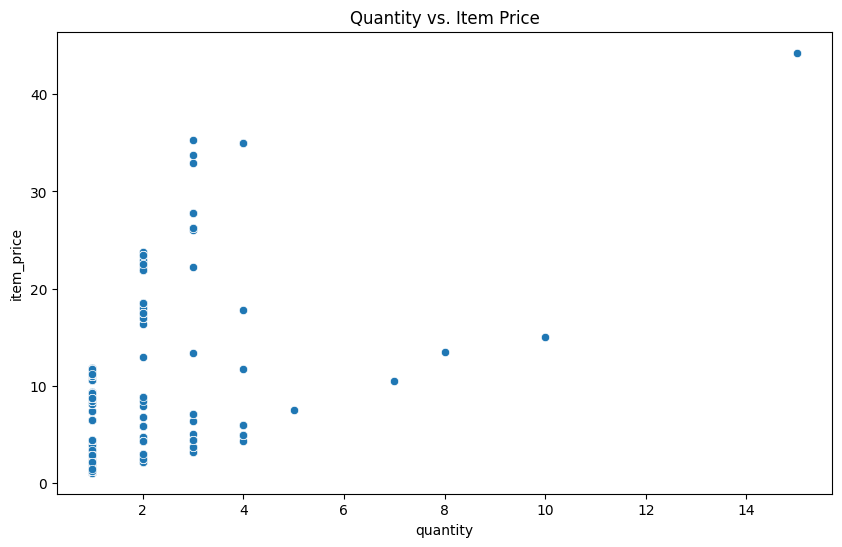

In [43]:
# Check for zero values in 'Quantity'
zero_quantity = df[df['quantity'] == 0]

# Check for zero values in 'Item Price'
zero_price = df[df['item_price'] == 0]

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Quantity vs. Item Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='item_price', data=df)
plt.title('Quantity vs. Item Price')
plt.show()



In [47]:
# Calculate the total price for each row
df['calculated_total_price'] = df['quantity'] * df['item_price']

# Check for inconsistencies between the calculated total price and the sum of quantity and item_price
inconsistent_total_price = df[df['calculated_total_price'] != (df['quantity'] * df['item_price'])]

# Display rows with inconsistent total price
print("Rows with inconsistent total price:")
print(inconsistent_total_price)



Rows with inconsistent total price:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price, consolidated_description, standardized_item_name, total_price, calculated_total_price]
Index: []


In [70]:
# Identify and handle outliers using, for example, Z-scores
from scipy.stats import zscore

# Calculate z-scores for 'quantity' and 'item_price'
df['z_score_quantity'] = zscore(df['quantity'])
df['z_score_price'] = zscore(df['item_price'])

# Filter rows with extreme z-scores (e.g., z > 3 or z < -3)
outliers = df[(abs(df['z_score_quantity']) > 14) | (abs(df['z_score_price']) > 0)]

# Display rows with extreme z-scores
print("Rows with extreme z-scores (potential outliers):")
print(outliers)

# Drop the added z-score columns if not needed for further analysis
df = df.drop(columns=['z_score_quantity', 'z_score_price'])
df


Rows with extreme z-scores (potential outliers):
      order_id  quantity                             item_name  \
0            1         1          chips and fresh tomato salsa   
1            1         1                                  izze   
2            1         1                      nantucket nectar   
3            1         1  chips and tomatillogreen chili salsa   
4            2         2                          chicken bowl   
...        ...       ...                                   ...   
4617      1833         1                         steak burrito   
4618      1833         1                         steak burrito   
4619      1834         1                    chicken salad bowl   
4620      1834         1                    chicken salad bowl   
4621      1834         1                    chicken salad bowl   

                                     choice_description  item_price  \
0                                                     0        2.39   
1               

,order_id,quantity,item_name,choice_description,item_price,consolidated_description,standardized_item_name,total_price,calculated_total_price
0,1,1,chips and fresh tomato salsa,0,2.39,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",chips and fresh tomato salsa,2.39,2.39
1,1,1,izze,clementine,3.39,"[Clementine], [Grapefruit], [Blackberry], [Bla...",izze,3.39,3.39
2,1,1,nantucket nectar,apple,3.39,"[Apple], [Pomegranate Cherry], [Pineapple Oran...",nantucket nectar,3.39,3.39
3,1,1,chips and tomatillogreen chili salsa,0,2.39,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",chips and tomatillogreen chili salsa,2.39,2.39
4,2,2,chicken bowl,tomatillored chili salsa hot black beans rice ...,16.98,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",chicken bowl,33.96,33.96
...,...,...,...,...,...,...,...,...,...
4617,1833,1,steak burrito,fresh tomato salsa rice black beans sour cream...,11.75,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",steak burrito,11.75,11.75
4618,1833,1,steak burrito,fresh tomato salsa rice sour cream cheese lett...,11.75,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",steak burrito,11.75,11.75
4619,1834,1,chicken salad bowl,fresh tomato salsa fajita vegetables pinto bea...,11.25,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",chicken salad bowl,11.25,11.25
4620,1834,1,chicken salad bowl,fresh tomato salsa fajita vegetables lettuce,8.75,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",chicken salad bowl,8.75,8.75


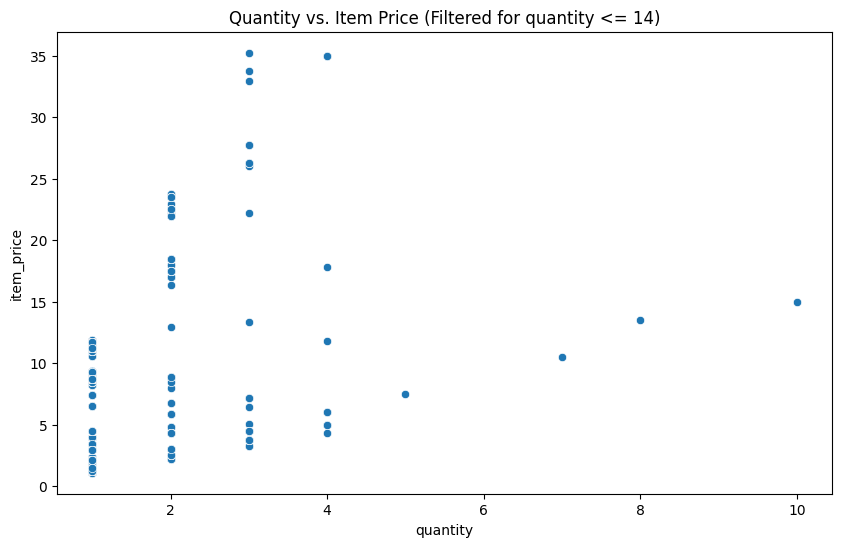

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Calculate z-scores for 'quantity'
df['z_score_quantity'] = zscore(df['quantity'])

# Filter rows where 'quantity' is less than or equal to 14
filtered_df = df[df['quantity'] <= 14]

# Scatter plot of 'quantity' vs. 'item_price' for the filtered DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='item_price', data=filtered_df)
plt.title('Quantity vs. Item Price (Filtered for quantity <= 14)')
plt.show()

# Drop the added z-score columns if not needed for further analysis
df = df.drop(columns=['z_score_quantity'])



## 10. Data Integrity Check:

Question: Perform a data integrity check by ensuring that quantities and prices align with the corresponding items and descriptions.


Ans:


In [80]:

# Check for inconsistencies between quantities, prices, and items
inconsistent_data = df[df['quantity'] * df['item_price'] != df['total_price']]

# Display rows with inconsistent data
print("Rows with inconsistent data:")
print(inconsistent_data)


Rows with inconsistent data:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price, consolidated_description, standardized_item_name, total_price, calculated_total_price]
Index: []


## 11. Converting to CSV:

Optional Question: If needed, convert the cleaned dataset to a CSV file using the to_csv function with sep=','.


## 12. Handling Categorical Data:

Question: For categorical columns (e.g., Item Name), consider encoding or transforming them into a format suitable for analysis.


Ans:

In [81]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'item_name' column
df['item_name_encoded'] = label_encoder.fit_transform(df['item_name'])


In [83]:
# Display unique units in 'Quantity' and 'Item Price' columns
unique_quantity_units = df['quantity'].unique()
unique_price_units = df['item_price'].unique()

print("Unique Quantity Units:", unique_quantity_units)
print("Unique Price Units:", unique_price_units)


Unique Quantity Units: [ 1  2  3  4  5 15  7  8 10]
Unique Price Units: [ 2.39  3.39 16.98 10.98  1.69 11.75  9.25  4.45  8.75 11.25  8.49  2.18
  8.99  1.09  2.95  2.15  3.99 22.5  11.48 17.98 17.5   4.3   5.9   1.25
 23.78  6.49 11.08  1.5  22.16 32.94 22.2  10.58  2.5  23.5   7.4  18.5
  3.    6.78 11.89  9.39  4.    3.75  8.69  2.29  8.9   3.27  3.89  8.19
 35.   27.75 11.8   6.   26.25 21.96  4.36  7.5   4.78 13.35  6.45  5.07
 22.96  7.17  7.98  4.5  26.07 12.98 35.25 44.25 10.5  33.75 16.38 13.52
  5.   15.    8.5  17.8   1.99 11.49]
